# **Elaboration of two MCDA models combining nutri-score and Eco-score**

# **Elaboration of two MCDA models combining nutri-score and Eco-score**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here we elaborated two decision models combining two criteria: the original nutri-score and the Eco-score.These figures showed distributions of two criteria.

<ipython-input-2-9459c8b3a074>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=nutriscore_counts.index, y=nutriscore_counts.values, palette="Blues_d")


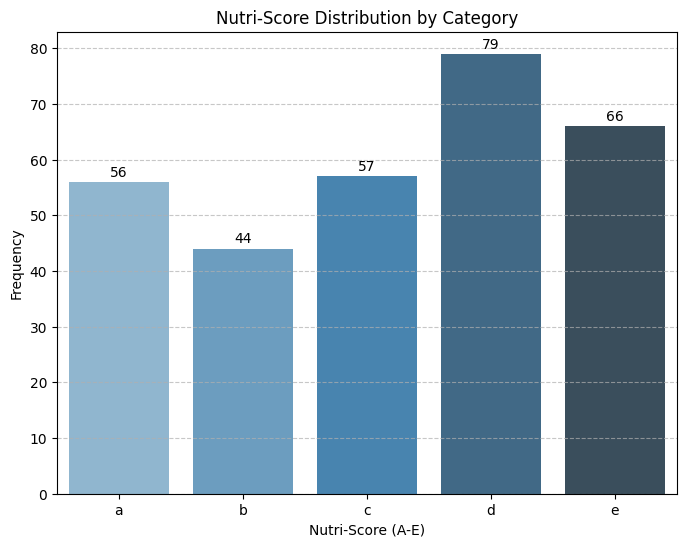

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"

# Read the file
data = pd.read_excel(file_path)

# Check if the 'Nutri-Score' column exists
if "Nutri-Score" in data.columns:
    # Count the frequency of values in the 'Nutri-Score' column
    nutriscore_counts = data["Nutri-Score"].value_counts().reindex(["a", "b", "c", "d", "e"], fill_value=0)

    # Plot a bar chart
    plt.figure(figsize=(8, 6))
    bars = sns.barplot(x=nutriscore_counts.index, y=nutriscore_counts.values, palette="Blues_d")
    plt.title("Nutri-Score Distribution by Category")
    plt.xlabel("Nutri-Score (A-E)")
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Add numerical labels on the bars
    for bar, count in zip(bars.patches, nutriscore_counts.values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.5,  # Position of the label slightly above the bar
            str(int(count)),
            ha="center",
            va="bottom",
            fontsize=10
        )

    plt.show()
else:
    print("The 'Nutri-Score' column is not found in the dataset.")


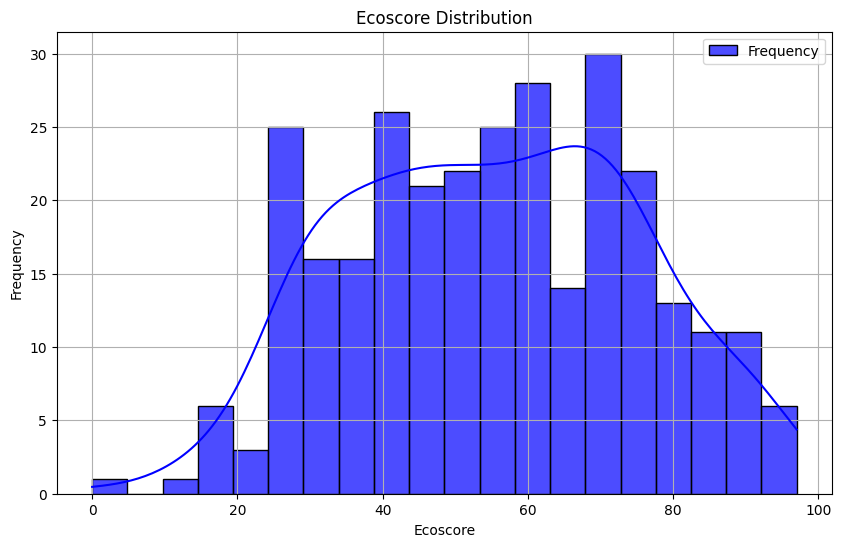

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"

# Load data
data = pd.read_excel(file_path)

# Check if Ecoscore column exists
if "Ecoscore" in data.columns:
    # Remove outliers (Ecoscore < 0 or Ecoscore > 100)
    data = data[(data["Ecoscore"] >= 0) & (data["Ecoscore"] <= 100)]

    # Plot Ecoscore distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(data["Ecoscore"], bins=20, kde=True, color="blue", edgecolor="black", alpha=0.7, label="Frequency")

    # Add a line plot for cumulative percentage
    #ecoscore_sorted = data["Ecoscore"].sort_values()
    #cumulative = ecoscore_sorted.cumsum() / ecoscore_sorted.sum()
    #plt.plot(ecoscore_sorted, cumulative, color="red", linestyle="--", label="Cumulative Percentage")

    plt.title("Ecoscore Distribution")
    plt.xlabel("Ecoscore")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("The 'Ecoscore' column is not found in the dataset.")


## The first model was a weighted sum model.
We set w1=w2=0.5 for both of Nutri-score and Eco-score.

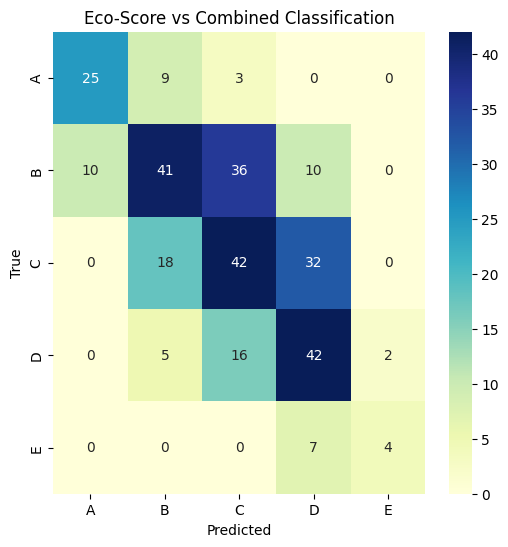

Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/weighted_sum_classified.xlsx


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# File path
file_path = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"

# Load data
data = pd.read_excel(file_path)

# Convert Nutri-Score to numerical values (a=5, b=4, c=3, d=2, e=1)
nutri_score_map = {"a": 5, "b": 4, "c": 3, "d": 2, "e": 1}
data["Nutri-Score (Numeric)"] = data["Nutri-Score"].map(nutri_score_map)

# Normalization function
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Normalize Nutri-Score and Eco-Score
data["Nutri-Score (Normalized)"] = normalize(data["Nutri-Score (Numeric)"])
data["Eco-Score (Normalized)"] = normalize(data["Ecoscore"])

# Calculate Combined Score (weights: 40% Nutri-Score, 60% Eco-Score)
data["Combined Score"] = 0.4 * data["Nutri-Score (Normalized)"] + 0.6 * data["Eco-Score (Normalized)"]

# Classification of Combined Score
def classify_combined_score(score):
    if score >= 0.8:
        return "A"
    elif score >= 0.6:
        return "B"
    elif score >= 0.4:
        return "C"
    elif score >= 0.2:
        return "D"
    else:
        return "E"

data["Combined Classification"] = data["Combined Score"].apply(classify_combined_score)

# Classification of Eco-Score
def classify_eco_score(eco_score):
    if eco_score >= 80:
        return "A"
    elif eco_score >= 60:
        return "B"
    elif eco_score >= 40:
        return "C"
    elif eco_score >= 20:
        return "D"
    else:
        return "E"

data["Eco-Score Classification"] = data["Ecoscore"].apply(classify_eco_score)

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, title):
    labels = ["A", "B", "C", "D", "E"]  # Fixed labels from A to E
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(6, 6))  # Suitable size for a 5x5 matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Compare Eco-Score and Combined Classification
plot_confusion_matrix(data["Eco-Score Classification"], data["Combined Classification"], "Eco-Score vs Combined Classification")

# Save results to Excel
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/weighted_sum_classified.xlsx"
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


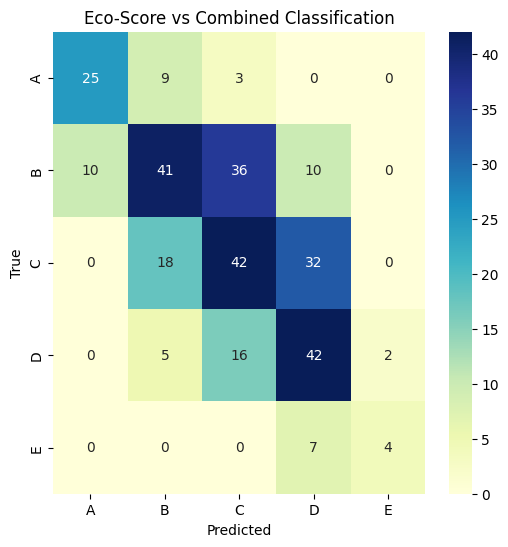

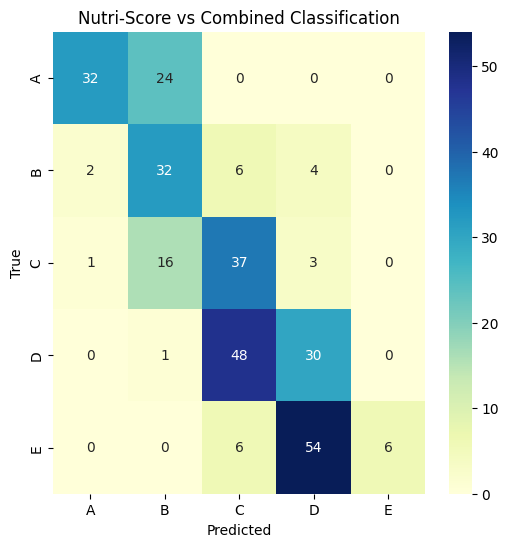

Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/weighted_sum_classified.xlsx


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# File path
file_path = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"

# Load data
data = pd.read_excel(file_path)

# Convert Nutri-Score to numerical values (a=5, b=4, c=3, d=2, e=1)
nutri_score_map = {"a": 5, "b": 4, "c": 3, "d": 2, "e": 1}
data["Nutri-Score (Numeric)"] = data["Nutri-Score"].map(nutri_score_map)

# Normalization function
def normalize(column):
    return (column - column.min()) / (column.max() - column.min())

# Normalize Nutri-Score and Eco-Score
data["Nutri-Score (Normalized)"] = normalize(data["Nutri-Score (Numeric)"])
data["Eco-Score (Normalized)"] = normalize(data["Ecoscore"])

# Calculate Combined Score (weights: 40% Nutri-Score, 60% Eco-Score)
data["Combined Score"] = 0.4 * data["Nutri-Score (Normalized)"] + 0.6 * data["Eco-Score (Normalized)"]

# Classification of Combined Score
def classify_combined_score(score):
    if score >= 0.8:
        return "A"
    elif score >= 0.6:
        return "B"
    elif score >= 0.4:
        return "C"
    elif score >= 0.2:
        return "D"
    else:
        return "E"

data["Combined Classification"] = data["Combined Score"].apply(classify_combined_score)

# Classification of Eco-Score
def classify_eco_score(eco_score):
    if eco_score >= 80:
        return "A"
    elif eco_score >= 60:
        return "B"
    elif eco_score >= 40:
        return "C"
    elif eco_score >= 20:
        return "D"
    else:
        return "E"

data["Eco-Score Classification"] = data["Ecoscore"].apply(classify_eco_score)

# Classification of Nutri-Score
def classify_nutri_score(nutri_score):
    if nutri_score == 5:
        return "A"
    elif nutri_score == 4:
        return "B"
    elif nutri_score == 3:
        return "C"
    elif nutri_score == 2:
        return "D"
    else:
        return "E"

data["Nutri-Score Classification"] = data["Nutri-Score (Numeric)"].apply(classify_nutri_score)

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, title):
    labels = ["A", "B", "C", "D", "E"]  # Fixed labels from A to E
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(6, 6))  # Suitable size for a 5x5 matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Compare Eco-Score and Combined Classification
plot_confusion_matrix(data["Eco-Score Classification"], data["Combined Classification"], "Eco-Score vs Combined Classification")

# Compare Nutri-Score and Combined Classification
plot_confusion_matrix(data["Nutri-Score Classification"], data["Combined Classification"], "Nutri-Score vs Combined Classification")

# Save results to Excel
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/weighted_sum_classified.xlsx"
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


## The second model based on simple decision rules.

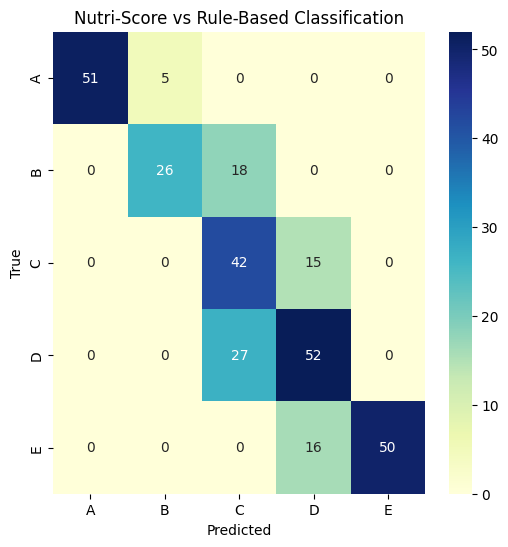

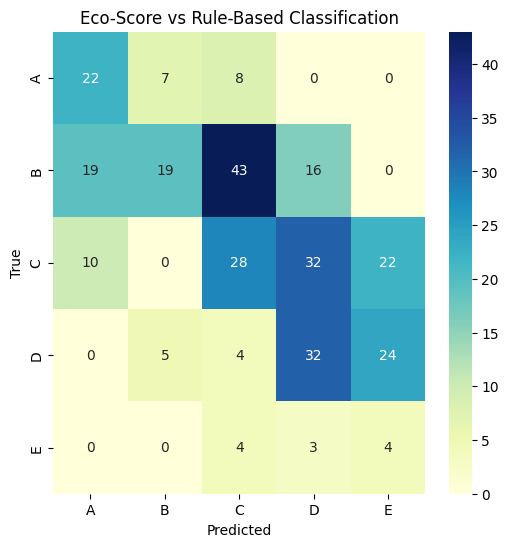

Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/rule_based_classified.xlsx


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# File path
file_path = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/food_data_cleaned1.xlsx"

# Load the data
data = pd.read_excel(file_path)

# Convert Nutri-Score to letter categories
nutri_score_map = {"a": "A", "b": "B", "c": "C", "d": "D", "e": "E"}
data["Nutri-Score (Category)"] = data["Nutri-Score"].map(nutri_score_map)

# Eco-Score classification function
def classify_eco_score(eco_score):
    if eco_score >= 80:
        return "A"
    elif eco_score >= 60:
        return "B"
    elif eco_score >= 40:
        return "C"
    elif eco_score >= 20:
        return "D"
    else:
        return "E"

# Classify Eco-Score
data["Eco-Score Classification"] = data["Ecoscore"].apply(classify_eco_score)

# Rule-based classification function
def rule_based_classification(nutri_score, eco_score):
    if nutri_score == "A":
        if eco_score in ["A", "B", "C"]:
            return "A"
        elif eco_score in ["D", "E"]:
            return "B"
    elif nutri_score == "B":
        if eco_score in ["A", "B"]:
            return "B"
        elif eco_score in ["C", "D", "E"]:
            return "C"
    elif nutri_score == "C":
        if eco_score in ["A", "B", "C"]:
            return "C"
        elif eco_score in ["D", "E"]:
            return "D"
    elif nutri_score == "D":
        if eco_score in ["A", "B"]:
            return "C"
        elif eco_score in ["C", "D", "E"]:
            return "D"
    elif nutri_score == "E":
        if eco_score in ["A", "B"]:
            return "D"
        elif eco_score in ["C", "D", "E"]:
            return "E"
    return "E"

# Apply rule-based classification
data["Rule-Based Classification"] = data.apply(
    lambda row: rule_based_classification(row["Nutri-Score (Category)"], row["Eco-Score Classification"]), axis=1
)

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels, title):
    labels = ["A", "B", "C", "D", "E"]
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Compare Nutri-Score and Rule-Based Classification results
plot_confusion_matrix(data["Nutri-Score (Category)"], data["Rule-Based Classification"], "Nutri-Score vs Rule-Based Classification")

# Compare Eco-Score and Rule-Based Classification results
plot_confusion_matrix(data["Eco-Score Classification"], data["Rule-Based Classification"], "Eco-Score vs Rule-Based Classification")

# Save the results
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/rule_based_classified.xlsx"
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")


In [16]:
# Calculate Decision Consistency Rate
total_decisions = len(data)
consistent_decisions = (data["Nutri-Score (Category)"] == data["Rule-Based Classification"]).sum()
consistency_rate = consistent_decisions / total_decisions

# Calculate Boundary Adjustment Rate
# Define boundary conditions (e.g., Nutri-Score values near boundaries like B, C, D)
boundary_conditions = data["Nutri-Score (Category)"].isin(["B", "C", "D"])
boundary_cases = data[boundary_conditions]
appropriate_adjustments = (boundary_cases["Rule-Based Classification"] == boundary_cases["Eco-Score Classification"]).sum()
boundary_adjustment_rate = appropriate_adjustments / len(boundary_cases) if len(boundary_cases) > 0 else None

# Analyze Adjustment Distribution Consistency
# Analyze Eco-Score adjustment distribution when Nutri-Score is B
nutri_b_cases = data[data["Nutri-Score (Category)"] == "B"]
eco_score_high = nutri_b_cases["Eco-Score Classification"].isin(["A", "B"])
adjustment_distribution_consistency = eco_score_high.sum() / len(nutri_b_cases) if len(nutri_b_cases) > 0 else None

# Print results
print("Decision Consistency Rate:", consistency_rate)
print("Boundary Adjustment Rate:", boundary_adjustment_rate)
print("Adjustment Distribution Consistency:", adjustment_distribution_consistency)



Decision Consistency Rate: 0.7317880794701986
Boundary Adjustment Rate: 0.4388888888888889
Adjustment Distribution Consistency: 0.5909090909090909


### **Three Metrics Overview**

1. **Decision Consistency Rate**:  
   Measures the agreement between `Nutri-Score (Category)` and `Rule-Based Classification`.  
   **Formula**:  
   \[
   \text{Consistency Rate} = \frac{\text{Consistent Decisions}}{\text{Total Decisions}}
   \]

2. **Boundary Adjustment Rate**:  
   Evaluates the rule-based model's accuracy in handling boundary cases (`B`, `C`, `D`) by aligning with `Eco-Score (Category)`.  
   **Formula**:  
   \[
   \text{Boundary Adjustment Rate} = \frac{\text{Appropriate Adjustments}}{\text{Boundary Cases}}
   \]

3. **Adjustment Distribution Consistency**:  
   Analyzes if `Eco-Score` for `Nutri-Score = B` falls into higher categories (`A`, `B`).  
   **Formula**:  
   \[
   \text{Distribution Consistency} = \frac{\text{High Eco-Score Cases}}{\text{Total B Cases}}
   \]

These metrics assess the rule-based model's overall reliability, boundary handling, and adjustment consistency.


## A comparison with another group
We appled our Rule-Based model to a database used by another group(Ben,Qasim,Gabriel).

In [21]:
# Calculate Decision Consistency Rate
total_decisions = len(data)
consistent_decisions = (data["Nutri-Score (Category)"] == data["Rule-Based Classification"]).sum()
consistency_rate = consistent_decisions / total_decisions

# Calculate Boundary Adjustment Rate
# Define boundary conditions (e.g., boundary cases for Nutri-Score, such as B close to C)
boundary_conditions = data["Nutri-Score (Category)"].isin(["B", "C", "D"])
boundary_cases = data[boundary_conditions]
appropriate_adjustments = (boundary_cases["Rule-Based Classification"] == boundary_cases["Eco-Score (Category)"]).sum()
boundary_adjustment_rate = appropriate_adjustments / len(boundary_cases)

# Analyze Adjustment Distribution Consistency
# Analyze the Eco-Score adjustment distribution when Nutri-Score is B
nutri_b_cases = data[data["Nutri-Score (Category)"] == "B"]
eco_score_high = nutri_b_cases["Eco-Score (Category)"].isin(["A", "B"])
adjustment_distribution_consistency = eco_score_high.sum() / len(nutri_b_cases)

# Return results
consistency_rate, boundary_adjustment_rate, adjustment_distribution_consistency


(0.6688102893890675, 0.4085106382978723, 0.08333333333333333)

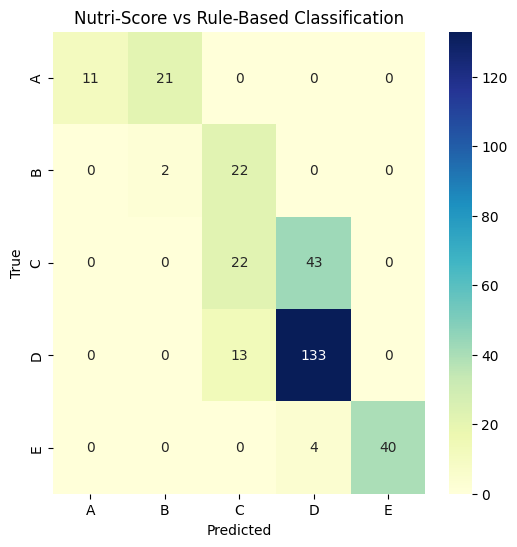

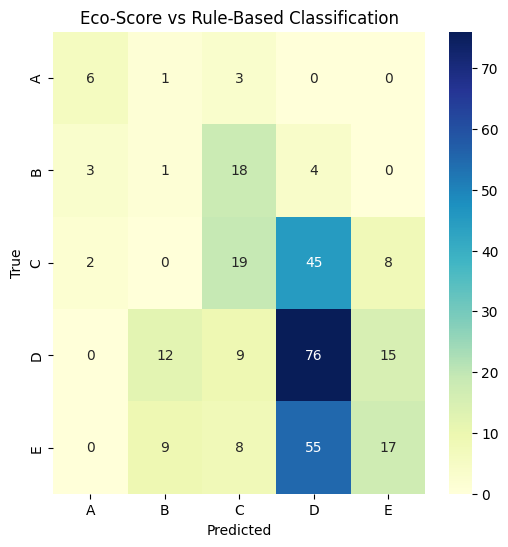

Results saved to /content/drive/MyDrive/Colab Notebooks/DM_Sacaly/rule_based_classified_products.xlsx


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# File path
file_path = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/products.xlsx"

# Load the data
data = pd.read_excel(file_path)

# Convert Nutri-Score and Eco-Score to letter categories (uppercase)
score_map = {"a": "A", "b": "B", "c": "C", "d": "D", "e": "E"}
data["Nutri-Score (Category)"] = data["nutriscore"].map(score_map)
data["Eco-Score (Category)"] = data["ecoscore"].map(score_map)

# Remove invalid values
data = data.dropna(subset=["Nutri-Score (Category)", "Eco-Score (Category)"])

# Ensure all categorical columns have string type
data["Nutri-Score (Category)"] = data["Nutri-Score (Category)"].astype(str)
data["Eco-Score (Category)"] = data["Eco-Score (Category)"].astype(str)

# Rule-based classification function
def rule_based_classification(nutri_score, eco_score):
    if nutri_score == "A":
        if eco_score in ["A", "B", "C"]:
            return "A"
        elif eco_score in ["D", "E"]:
            return "B"
    elif nutri_score == "B":
        if eco_score in ["A", "B"]:
            return "B"
        elif eco_score in ["C", "D", "E"]:
            return "C"
    elif nutri_score == "C":
        if eco_score in ["A", "B", "C"]:
            return "C"
        elif eco_score in ["D", "E"]:
            return "D"
    elif nutri_score == "D":
        if eco_score in ["A", "B"]:
            return "C"
        elif eco_score in ["C", "D", "E"]:
            return "D"
    elif nutri_score == "E":
        if eco_score in ["A", "B"]:
            return "D"
        elif eco_score in ["C", "D", "E"]:
            return "E"
    return "E"

# Apply rule-based classification
data["Rule-Based Classification"] = data.apply(
    lambda row: rule_based_classification(row["Nutri-Score (Category)"], row["Eco-Score (Category)"]), axis=1
)

# Ensure the Rule-Based Classification result is also a string
data["Rule-Based Classification"] = data["Rule-Based Classification"].astype(str)

# Confusion matrix comparison function
def plot_confusion_matrix(true_labels, predicted_labels, title):
    labels = ["A", "B", "C", "D", "E"]
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Compare Nutri-Score and Rule-Based Classification results
plot_confusion_matrix(data["Nutri-Score (Category)"], data["Rule-Based Classification"], "Nutri-Score vs Rule-Based Classification")

# Compare Eco-Score and Rule-Based Classification results
plot_confusion_matrix(data["Eco-Score (Category)"], data["Rule-Based Classification"], "Eco-Score vs Rule-Based Classification")

# Save the results
output_file = "/content/drive/MyDrive/Colab Notebooks/DM_Sacaly/rule_based_classified_products.xlsx"
data.to_excel(output_file, index=False)
print(f"Results saved to {output_file}")
